<a href="https://colab.research.google.com/github/Cind0928/SIM_YAC_URRUNAGA_UPSE2023/blob/main/Metodo_explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import math

In [19]:
L=30000
dx=250
Tiempo=100000
DT=1
K=50 #Permeabilidad MD
por=0.5
vis=1 # centipoise
Beta=0.7
CompTotal=1.2**(-6) #ps1-1
A=200000#ft^2

In [20]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta


0.004777574399999999

In [21]:
#Esquema Explicito
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-2*P1+P2)
  return(Pdt)

Pexplicita=np.zeros((Tiempo//DT,L//dx))


In [22]:
#Condiciones inicialea
Pyac=1000
Piz=0
Pder=0
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pres2=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder

Pin

array([   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000.,    0.])

In [23]:
Pin[len(Pin)-1]


0.0

In [24]:
t=DT
Pexplicita[0]=Pin
while t<Tiempo:
  for i in range(0,len(Pin)-1):
    if i==0:
      Pres[i]=Pin[0]
    elif i==len(Pin)-1:
      Pres[i]=Pin[len(Pin)-1]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres

In [25]:
#Presexplicita

In [26]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,L//dx))

Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolucion=np.zeros([N-2,N-2])


In [27]:
for i in range(N-2):
  Matriz_resolucion[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion[i,i-1]=-Eta
  if i<(N-3):
    Matriz_resolucion[i,i+1]=-Eta


In [28]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])

In [29]:
Pcal

array([ 995.26753798,  999.9776038 ,  999.99989401,  999.9999995 ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.     

In [30]:
Pder

0

In [31]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

array([   0.        ,  995.26753798,  999.9776038 ,  999.99989401,
        999.9999995 , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.     

In [32]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT

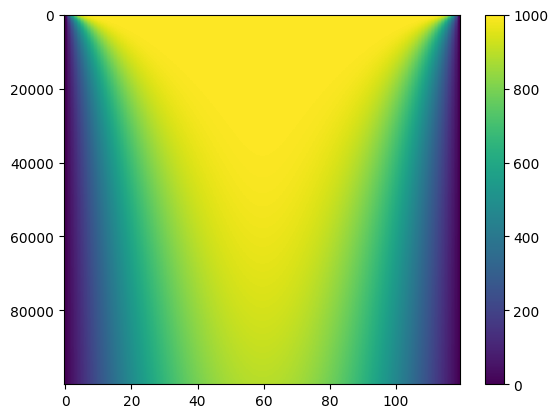

In [33]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

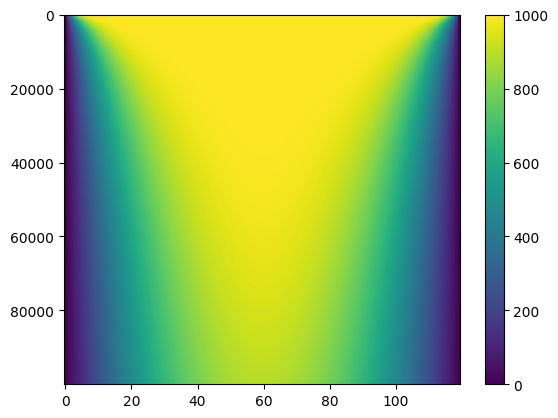

In [34]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()